## 라이브러리 임포트

In [1]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd

import category_encoders as ce

## 데이터 인코딩
- 범주형 데이터를 수치형 데이터로 인코딩    
- One hot Encoding이 가장 좋으나, 너무 범주가 많은 경우에 효과적이지 않을 수 있다. 


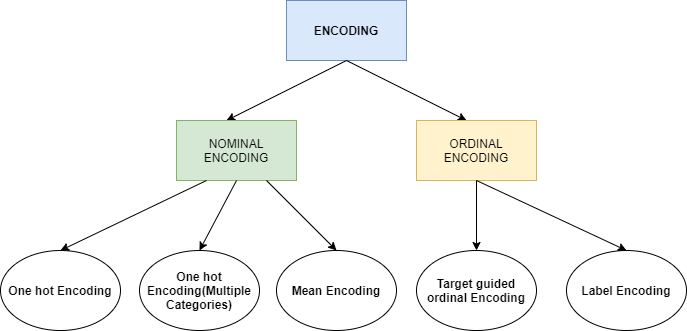

## Norminal Encoding
- 순서 정보가 없는 데이터

#### One hot Encoding
- 피처의 항목이 많은 경우 차원의 저주에 빠질 수 있다.    
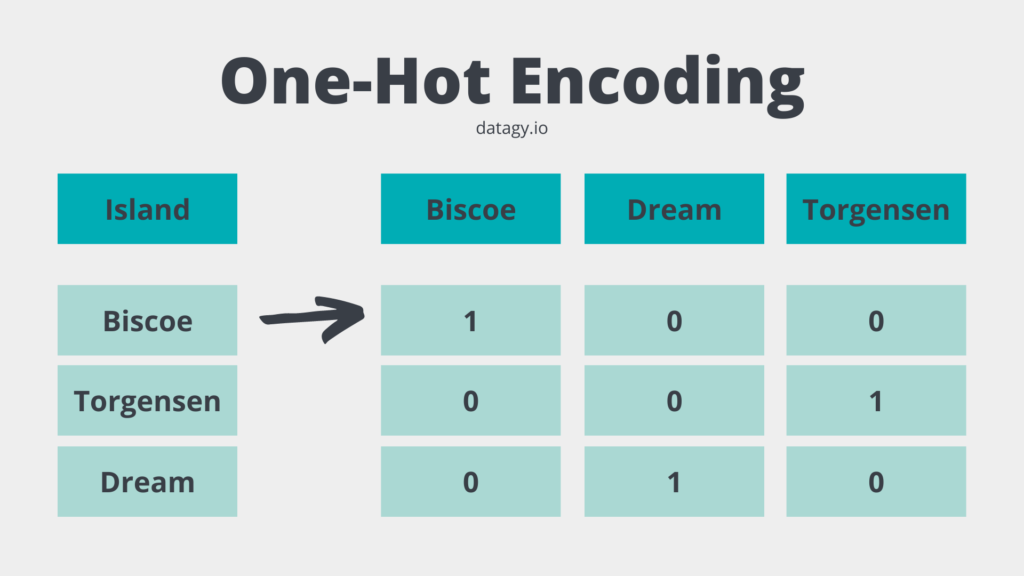

In [3]:
data = {'color' : ['Red', 'Blue', 'Green']}
df = pd.DataFrame(data)
df

,color
0,Red
1,Blue
2,Green


In [4]:
encoder = ce.OneHotEncoder(use_cat_names=True)

# ecnoder를 fit으로 학습하고 transform으로 반영한다. 
df_encoded = encoder.fit_transform(df)
df_encoded.head()

,color_Red,color_Blue,color_Green
0,1,0,0
1,0,1,0
2,0,0,1


#### Mean Encoding
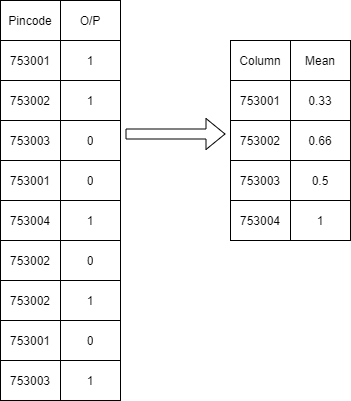

In [5]:
data = {'Pincode' : ['753001','753002', '753003', '753001', '753004', '753002', '753002', '753001', '753003' ]
              , 'O/P' : [1,1, 0, 0,1, 0,1,0 ,1]}

df = pd.DataFrame(data)
df

,Pincode,O/P
0,753001,1
1,753002,1
2,753003,0
3,753001,0
4,753004,1
5,753002,0
6,753002,1
7,753001,0
8,753003,1


In [6]:
# groupby를 이용해 각 항목의 평균값 구하기 
group_mean = df.groupby('Pincode')['O/P'].mean()
group_mean

Pincode
753001    0.333333
753002    0.666667
753003    0.500000
753004    1.000000
Name: O/P, dtype: float64

In [7]:
# map을 이용하여 Mean 컬럼 만들기 
df['Mean'] = df['Pincode'].map(group_mean)
df.head()

,Pincode,O/P,Mean
0,753001,1,0.333333
1,753002,1,0.666667
2,753003,0,0.500000
3,753001,0,0.333333
4,753004,1,1.000000


## Ordinal Encoding

#### Label Encoding

- 순서가 중요할때 사용

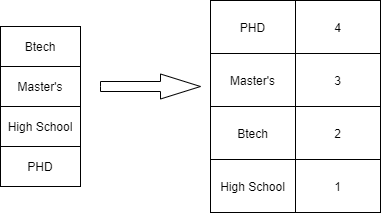

In [8]:
data = {'column' : ['Btech', 'Masters', 'High School', 'PHD']}
df = pd.DataFrame(data)
df

,column
0,Btech
1,Masters
2,High School
3,PHD


sklearn을 이용한 인코딩

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
# 무엇이 우선순위인지 알기가 어렵다 
encoder = LabelEncoder()
df['column_encoded'] = encoder.fit_transform(df['column'])
df.head()

,column,column_encoded
0,Btech,0
1,Masters,2
2,High School,1
3,PHD,3


In [11]:
encoder.classes_

array(['Btech', 'High School', 'Masters', 'PHD'], dtype=object)

In [12]:
encoder.inverse_transform([0,1])

array(['Btech', 'High School'], dtype=object)

### Target Encoding

- target 값을 설정할 수 있고, 이를 기준으로 라벨 설정 가능
- 카테고리마다 목적 변수의 평균을 할당한다.

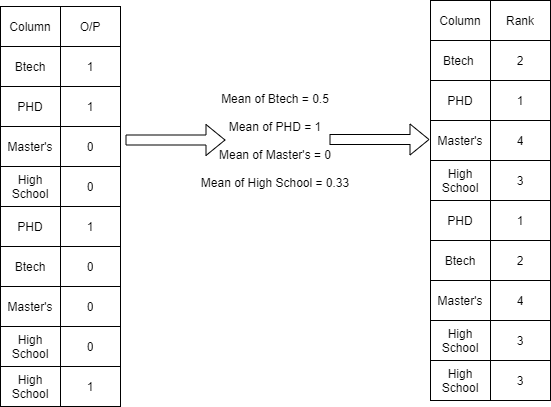

In [13]:
data = {'column' : ['Btech', 'PHD', 'Masters', 'High School', 'PHD', 'Btech', 'Masters', 'High School', 'High School'] 
                , 'O/P' : [1, 1, 0, 0, 1, 0, 0, 0, 1]}
df = pd.DataFrame(data)
df

,column,O/P
0,Btech,1
1,PHD,1
2,Masters,0
3,High School,0
4,PHD,1
5,Btech,0
6,Masters,0
7,High School,0
8,High School,1


 category_encoder를 이용한 인코딩

In [14]:
encoder = ce.TargetEncoder()

df_encoded = encoder.fit_transform(df['column'], df['O/P'])
df['encoded'] = df_encoded['column']
df['Rank'] = df['encoded'].rank(method = 'dense', ascending=False)

df

,column,O/P,encoded,Rank
0,Btech,1,0.452325,2.0
1,PHD,1,0.523251,1.0
2,Masters,0,0.381400,4.0
3,High School,0,0.427282,3.0
4,PHD,1,0.523251,1.0
5,Btech,0,0.452325,2.0
6,Masters,0,0.381400,4.0
7,High School,0,0.427282,3.0
8,High School,1,0.427282,3.0


### Ordinal Encoding

In [15]:
df = pd.DataFrame(
    {'Fruit' : ['사과', '딸기', '바나나', '수박', '포도', '메론', '자두', '체리', '화이트베리', '무화과'],
      'color' : ['red1', 'red2', 'yellow', 'red', 'purple', 'green', 'light red', 'pink', 'white', 'brown'],
     'price' : [2000, 300, 400, 30000, 150, 8000, 1000, 100, 300, 800]})

df.head()

,Fruit,color,price
0,사과,red1,2000
1,딸기,red2,300
2,바나나,yellow,400
3,수박,red,30000
4,포도,purple,150


In [16]:
encoder = ce.OrdinalEncoder(cols='color')

df_encoded = encoder.fit_transform(df)
df_encoded.head()

,Fruit,color,price
0,사과,1,2000
1,딸기,2,300
2,바나나,3,400
3,수박,4,30000
4,포도,5,150


## 예제

In [17]:
results = []

In [18]:
# 모델 정의
from sklearn.tree import DecisionTreeClassifier
SEED = 42

In [19]:
# 데이터 로드
import seaborn as sns

df = sns.load_dataset('titanic')
cols = ['age', 'sibsp', 'parch', 'fare', 'pclass', 'sex', 'embarked', 'survived']
df = df[cols]
df.shape

(891, 8)

데이터 분리

In [20]:
from sklearn.model_selection import train_test_split
SEED = 42

train, test = train_test_split(df, random_state=SEED, test_size = 0.2)
train.shape, test.shape

((712, 8), (179, 8))

결측치 제거

In [21]:
# 평균값으로 결측치 채우기 
train.age = train.age.fillna(train.age.mean())
test.age = test.age.fillna(train.age.mean())

# 최빈값으로 결측치 채우기 
train.embarked = train.embarked.fillna(train.embarked.mode().values[0])
test.embarked = test.embarked.fillna(train.embarked.mode().values[0])

train.isnull().sum().sum(), test.isnull().sum().sum()

(0, 0)

In [22]:
train.embarked.mode()[0]

'S'

In [23]:
cols = ['age', 'fare']

features_tr = train[cols]
target_tr = train['survived']
features_te = test[cols]
target_te = test['survived']

features_tr.shape, target_tr.shape

((712, 2), (712,))

In [24]:
# 인코딩 할 범주형 데이터들을 따로 할당한다. 
cols_encoding = ['pclass', 'sex', 'embarked', 'sibsp', 'parch']
tmp_tr = train[cols_encoding]
tmp_te = test[cols_encoding]

tmp_tr.shape

(712, 5)

In [25]:
tmp_tr.head()

,pclass,sex,embarked,sibsp,parch
331,1,male,S,0,0
733,2,male,S,0,0
382,3,male,S,0,0
704,3,male,S,1,0
813,3,female,S,4,2


In [26]:
tmp_tr['sex'] = tmp_tr['sex'].map({'male' : 1, 'female' : 0})
tmp_tr['embarked'] = tmp_tr['embarked'].map({'S' : 2, 'C' : 1, 'Q' : 0})

tmp_te['sex'] = tmp_te['sex'].map({'male' : 1, 'female' : 0})
tmp_te['embarked'] = tmp_te['embarked'].map({'S' : 2, 'C' : 1, 'Q' : 0})

<ipython-input-26-82b978f03b36>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_tr['sex'] = tmp_tr['sex'].map({'male' : 1, 'female' : 0})
<ipython-input-26-82b978f03b36>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_tr['embarked'] = tmp_tr['embarked'].map({'S' : 2, 'C' : 1, 'Q' : 0})
<ipython-input-26-82b978f03b36>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [27]:
tmp_tr.head()

,pclass,sex,embarked,sibsp,parch
331,1,1,2,0,0
733,2,1,2,0,0
382,3,1,2,0,0
704,3,1,2,1,0
813,3,0,2,4,2


In [28]:
tmp_tr.isnull().sum().sum() , tmp_te.isnull().sum().sum()

(0, 0)

### One hot Encoding

In [29]:
encoder = ce.OneHotEncoder(use_cat_names=True)

In [30]:
# 빈 데이터 프레임을 생성 
enco_tr = pd.DataFrame()
enco_te = pd.DataFrame()

# column을 한개씩 꺼내서 인코딩, 데이터 프레임으로 변환 
for col in tmp_tr.columns :
  _enco = encoder.fit_transform(tmp_tr[col].astype('category'))
  enco_tr = pd.concat([enco_tr, _enco], axis=1)

  _enco = encoder.transform(tmp_te[col].astype('category'))
  enco_te = pd.concat([enco_te, _enco], axis=1)

print(f'{enco_tr.shape} / {enco_te.shape}')
enco_tr.head()

(712, 22) / (179, 22)


,pclass_1.0,pclass_2.0,pclass_3.0,sex_1.0,sex_0.0,embarked_2.0,embarked_1.0,embarked_0.0,sibsp_0.0,sibsp_1.0,...,sibsp_2.0,sibsp_8.0,sibsp_5.0,parch_0.0,parch_2.0,parch_1.0,parch_6.0,parch_4.0,parch_3.0,parch_5.0
331,1,0,0,1,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
733,0,1,0,1,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
382,0,0,1,1,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
704,0,0,1,1,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
813,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [31]:
# 인덱스 재설정 

features_tr = features_tr.reset_index(drop=True)
features_te = features_te.reset_index(drop=True)
enco_tr = enco_tr.reset_index(drop=True)
enco_te = enco_te.reset_index(drop=True)

features_tr.shape, enco_tr.shape

((712, 2), (712, 22))

In [32]:
# 최종 데이터프레임을 concat으로 생성한 후 인덱스 재설정 
df_tr = pd.concat([features_tr, enco_tr], axis=1).reset_index(drop=True) 
df_te = pd.concat([features_te, enco_te], axis=1).reset_index(drop=True)

print(f'{df_tr.shape} /{df_te.shape}' )
df_tr.head()

(712, 24) /(179, 24)


,age,fare,pclass_1.0,pclass_2.0,pclass_3.0,sex_1.0,sex_0.0,embarked_2.0,embarked_1.0,embarked_0.0,...,sibsp_2.0,sibsp_8.0,sibsp_5.0,parch_0.0,parch_2.0,parch_1.0,parch_6.0,parch_4.0,parch_3.0,parch_5.0
0,45.5,28.5000,1,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,23.0,13.0000,0,1,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,32.0,7.9250,0,0,1,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,26.0,7.8542,0,0,1,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,6.0,31.2750,0,0,1,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [33]:
df_te.isnull().sum().sum()

0

In [34]:
model = DecisionTreeClassifier(random_state=SEED)
model.fit(df_tr,target_tr)

tr_score = model.score(df_tr,target_tr) 
te_score = model.score(df_te,target_te)

tr_score, te_score


(0.9803370786516854, 0.776536312849162)

In [35]:
results.append(
    {
        'encoding': 'one-hot',
        'tr_score': tr_score,
        'te_score': te_score
    }
)

### Mean Encoding

In [36]:
enco_tr = pd.concat([tmp_tr, target_tr,], axis=1).reset_index(drop=True)
enco_tr.head()

,pclass,sex,embarked,sibsp,parch,survived
0,1,1,2,0,0,0
1,2,1,2,0,0,0
2,3,1,2,0,0,0
3,3,1,2,1,0,0
4,3,0,2,4,2,0


In [37]:
enco_tr = enco_tr.groupby('survived').mean()
enco_tr

,pclass,sex,embarked,sibsp,parch
survived,,,,,
0,2.536036,0.855856,1.70045,0.596847,0.331081
1,1.988806,0.324627,1.58209,0.481343,0.458955


In [38]:
# survived 컬럼을 가져오기 위해 features만 있는 데이터 프레임에 survived 컬럼을 추가한다. 
df_tr = features_tr.copy()
df_tr = pd.concat([df_tr.reset_index(drop=True), target_tr.reset_index(drop=True)], axis=1)
df_te = features_te.copy()
df_te = pd.concat([df_te.reset_index(drop=True), target_te.reset_index(drop=True)], axis=1)

# merge 후 test data는 train data로 인코딩을 한다. 
df_tr = pd.merge(df_tr, enco_tr, on='survived', how='left')
df_te = pd.merge(df_te, enco_tr, on='survived', how='left')

# join을 위해 넣었던 survived 컬럼을 드랍한다. 
df_tr.drop(['survived'], axis=1, inplace=True)
df_te.drop(['survived'], axis=1, inplace=True)

print(f'{df_tr.shape} / {df_te.shape}')
df_tr.head()

(712, 7) / (179, 7)


,age,fare,pclass,sex,embarked,sibsp,parch
0,45.5,28.5000,2.536036,0.855856,1.70045,0.596847,0.331081
1,23.0,13.0000,2.536036,0.855856,1.70045,0.596847,0.331081
2,32.0,7.9250,2.536036,0.855856,1.70045,0.596847,0.331081
3,26.0,7.8542,2.536036,0.855856,1.70045,0.596847,0.331081
4,6.0,31.2750,2.536036,0.855856,1.70045,0.596847,0.331081


In [39]:
# overfitting 
model = DecisionTreeClassifier()
model.fit(df_tr, target_tr)

tr_score = model.score(df_tr, target_tr)
te_score = model.score(df_te, target_te)

tr_score, te_score

(1.0, 1.0)

In [40]:
results.append(
    {
        'encoding': 'mean',
        'tr_score': tr_score,
        'te_score': te_score
    }
)

### Label Encoding

In [41]:
encoder = LabelEncoder()
enco_tr = pd.DataFrame()
enco_te = pd.DataFrame()

# 라벨인코딩 실행 
for col in tmp_tr.columns :
  enco_tr[col] = encoder.fit_transform(tmp_tr[col])
  enco_te[col] = encoder.transform(tmp_te[col])

print(f'{enco_tr.shape} / {enco_te.shape}')
enco_tr.head()

(712, 5) / (179, 5)


,pclass,sex,embarked,sibsp,parch
0,0,1,2,0,0
1,1,1,2,0,0
2,2,1,2,0,0
3,2,1,2,1,0
4,2,0,2,4,2


In [42]:
features_tr = features_tr.reset_index(drop=True)
features_te = features_te.reset_index(drop=True)

enco_tr = enco_tr.reset_index(drop=True)
enco_te = enco_te.reset_index(drop=True)

features_tr.shape, enco_tr.shape

((712, 2), (712, 5))

In [43]:
model = DecisionTreeClassifier(random_state=SEED)
model.fit(df_tr,target_tr)

tr_score = model.score(df_tr,target_tr) 
te_score = model.score(df_te,target_te)

tr_score, te_score

(1.0, 1.0)

In [44]:
results.append(
    {
        'encoding': 'label',
        'tr_score': tr_score,
        'te_score': te_score
    }
)

### Target Encoding

In [45]:
encoder = ce.TargetEncoder()

In [46]:
enco_tr = encoder.fit_transform(tmp_tr.reset_index(drop=True), target_tr.reset_index(drop=True))
enco_te = encoder.transform(tmp_te.reset_index(drop=True))

print(f'{enco_tr.shape} / {enco_te.shape}')
enco_tr.head()

(712, 5) / (179, 5)


,pclass,sex,embarked,sibsp,parch
0,1,1,2,0,0
1,2,1,2,0,0
2,3,1,2,0,0
3,3,1,2,1,0
4,3,0,2,4,2


In [47]:
features_tr = features_tr.reset_index(drop=True)
features_te = features_te.reset_index(drop=True)
enco_tr = enco_tr.reset_index(drop=True)
enco_te = enco_te.reset_index(drop=True)

features_tr.shape, enco_tr.shape

((712, 2), (712, 5))

In [48]:
df_tr = pd.concat([features_tr,enco_tr],axis=1).reset_index(drop=True)
df_te = pd.concat([features_te,enco_te],axis=1).reset_index(drop=True)

print(f'{df_tr.shape} / {df_te.shape}')
df_tr.head()

(712, 7) / (179, 7)


,age,fare,pclass,sex,embarked,sibsp,parch
0,45.5,28.5000,1,1,2,0,0
1,23.0,13.0000,2,1,2,0,0
2,32.0,7.9250,3,1,2,0,0
3,26.0,7.8542,3,1,2,1,0
4,6.0,31.2750,3,0,2,4,2


In [49]:
model = DecisionTreeClassifier()
model.fit(df_tr, target_tr)

tr_score = model.score(df_tr, target_tr)
te_score = model.score(df_te, target_te)

tr_score, te_score

(0.9803370786516854, 0.7821229050279329)

In [50]:
results.append(
    {
        'encoding': 'target',
        'tr_score': tr_score,
        'te_score': te_score
    }
)

### Ordinal Encoding

In [51]:
encoder = ce.OrdinalEncoder(cols = tmp_tr.columns)

In [52]:
enco_tr = encoder.fit_transform(tmp_tr)
enco_te = encoder.transform(tmp_te)

print(f'{enco_tr.shape} / {enco_te.shape}')
enco_tr.head()

(712, 5) / (179, 5)


,pclass,sex,embarked,sibsp,parch
331,1,1,1,1,1
733,2,1,1,1,1
382,3,1,1,1,1
704,3,1,1,2,1
813,3,2,1,3,2


In [53]:
features_tr = features_tr.reset_index(drop=True)
features_te = features_te.reset_index(drop=True)
enco_tr = enco_tr.reset_index(drop=True)
enco_te = enco_te.reset_index(drop=True)

features_tr.shape, enco_tr.shape

((712, 2), (712, 5))

In [54]:
df_tr = pd.concat([features_tr, enco_tr], axis=1,).reset_index(drop=True)
df_te = pd.concat([features_te, enco_te], axis=1).reset_index(drop=True)

print(f'{df_tr.shape} / {df_te.shape}')
df_tr.head()

(712, 7) / (179, 7)


,age,fare,pclass,sex,embarked,sibsp,parch
0,45.5,28.5000,1,1,1,1,1
1,23.0,13.0000,2,1,1,1,1
2,32.0,7.9250,3,1,1,1,1
3,26.0,7.8542,3,1,1,2,1
4,6.0,31.2750,3,2,1,3,2


In [55]:
model = DecisionTreeClassifier()
model.fit(df_tr, target_tr)

tr_score = model.score(df_tr, target_tr)
te_score = model.score(df_te, target_te)

tr_score, te_score

(0.9803370786516854, 0.770949720670391)

In [56]:
results.append(
    {
        'encoding' : 'ordinal',
        'tr_score' : tr_score,
        'te_score' : te_score 
    }
)

### 결과 확인

In [57]:
pd.DataFrame(results).sort_values(by=['te_score', 'tr_score'], ascending=[False, False])

,encoding,tr_score,te_score
1,mean,1.000000,1.000000
2,label,1.000000,1.000000
3,target,0.980337,0.782123
0,one-hot,0.980337,0.776536
4,ordinal,0.980337,0.770950
